In [1]:
# importar las librerías necesarias
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import re

vemos una linea del archivo. <br> 
Vemos datos anidados en las columnas 'tags', 'genres'  y'specs' <br>
{"publisher": "Dagestan Technology", <br>
 "genres": ["Action", "Adventure", "Indie"], <br>
 "app_name": "Bloodbath Kavkaz - Soundtrack", <br>
 "title": "Bloodbath Kavkaz - Soundtrack", <br>
 "url": "http://store.steampowered.com/app/354260/Bloodbath_Kavkaz__Soundtrack/", <br>
 "release_date": "2015-04-28", <br>
 "tags": ["Adventure", "Indie", "Action", "Great Soundtrack"], <br>
 "reviews_url": "http://steamcommunity.com/app/354260/reviews/?browsefilter=mostrecent&p=1", <br>
 "specs": ["Single-player", "Downloadable Content", "Full controller support", "Steam Trading Cards"], <br>
 "price": 3.99, <br>
 "early_access": false, <br>
 "id": "354260", <br>
 "developer": "Dagestan Technology"}<br>

In [3]:
# cargamos el archivo
steam_games = "c:\\Users\\Sofia\\Desktop\\Datasets\\output_steam_games.json"

df_steam = pd.read_json(steam_games, lines=True)

df_steam = df_steam[['publisher', 'genres', 'app_name', 'title', 'id', 'release_date', 'tags', 'specs', 'price', 'early_access', 'developer']]
    # las columnas 'url' y 'reviews_url' no las cargamos ya que no serán de utilidad


In [4]:
# vemos las primeras líneas del dataframe 
df_steam.head()

,publisher,genres,app_name,title,id,release_date,tags,specs,price,early_access,developer
0,None,None,None,None,NaN,None,None,None,None,NaN,None
1,None,None,None,None,NaN,None,None,None,None,NaN,None
2,None,None,None,None,NaN,None,None,None,None,NaN,None
3,None,None,None,None,NaN,None,None,None,None,NaN,None
4,None,None,None,None,NaN,None,None,None,None,NaN,None


In [5]:
# vemos el porcentaje de nulos
df_steam.isna().sum()*100 / len(df_steam)       # vemos un 80% de valores nulos en publisher, y más de un 70 % en todas las columnas

publisher       80.004982
genres          76.045498
app_name        73.321433
title           75.021794
id              73.321433
release_date    75.035909
tags            73.455104
specs           73.876043
price           74.463033
early_access    73.319773
developer       76.058782
dtype: float64

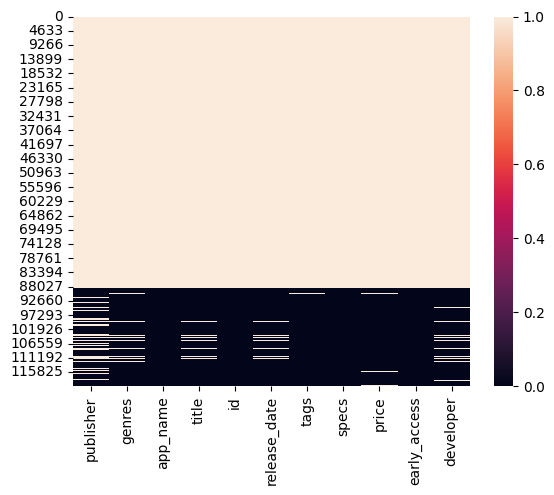

In [6]:
# graficamos los nulos con un mapa de calor, viendo que hay muchas filas sin datos
sns.heatmap(df_steam.isna());       

In [6]:
df_steam.dropna(how='all', inplace=True)            # eliminamos filas nulas

In [7]:
df_steam.isna().sum()*100 / len(df_steam)           # nos quedan las columnas publisher y genres con mayor cantidad de nulos

publisher       25.056792
genres          10.216275
app_name         0.006224
title            6.379337
id               0.006224
release_date     6.432239
tags             0.507235
specs            2.084954
price            4.285047
early_access     0.000000
developer       10.266065
dtype: float64

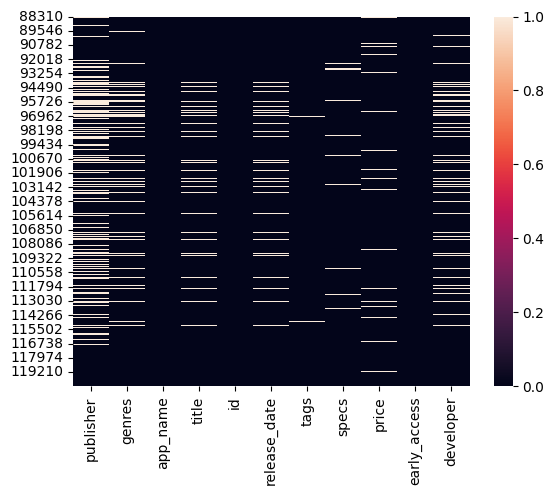

In [9]:
sns.heatmap(df_steam.isna());                       # nuevamente con un mapa de calor vemos la distribución de los nulos

In [8]:
df_steam[['developer', 'publisher']]                # vemos cómo están compuestas las columnas developoer y publisher.
                                                    # Aunque a veces coincide developer y publisher, no necesariamente son la misma empresa

,developer,publisher
88310,Kotoshiro,Kotoshiro
88311,Secret Level SRL,"Making Fun, Inc."
88312,Poolians.com,Poolians.com
88313,彼岸领域,彼岸领域
88314,None,None
...,...,...
120440,"Nikita ""Ghost_RUS""",Ghost_RUS Games
120441,Sacada,Sacada
120442,Laush Dmitriy Sergeevich,Laush Studio
120443,"xropi,stev3ns",SIXNAILS


In [9]:
# veamos las filas donde developer es nulo y no es nulo publisher
filter = (df_steam['developer'].isna()) & (~df_steam['publisher'].isna())
df_steam[filter][['developer', 'publisher']]

,developer,publisher
88427,None,Retroism
88576,None,"ValuSoft, Retroism"
88614,None,Meridian4
88617,None,"ValuSoft, Retroism"
89039,None,Ubisoft
...,...,...
118602,None,Ubisoft
119297,None,SEGA
119298,None,SEGA
119299,None,SEGA


In [10]:
# eliminemos las filas que tienen más de 50% de valores nulos:
umbral = 0.5
filter = df_steam.isnull().mean(axis=1) < umbral
df_steam = df_steam[filter]
df_steam.head()

,publisher,genres,app_name,title,id,release_date,tags,specs,price,early_access,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,761140.0,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0.0,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,643980.0,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,670290.0,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.0,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,767400.0,2017-12-07,"[Action, Adventure, Casual]",[Single-player],0.99,0.0,彼岸领域
88314,None,None,Log Challenge,None,773570.0,None,"[Action, Indie, Casual, Sports]","[Single-player, Full controller support, HTC V...",2.99,0.0,None


In [11]:
df_steam.isna().sum()*100 / len(df_steam)               # volvemos a ver el porcentaje de nulos  

publisher       24.771187
genres           9.874114
app_name         0.003124
title            6.035048
id               0.003124
release_date     6.088152
tags             0.490426
specs            2.077281
price            3.926530
early_access     0.000000
developer        9.924093
dtype: float64

In [12]:
empty = [[], [''], [' '], '', ' ']                      # verificamos que en la columna publisher no haya nulos de tipo string
df_steam[df_steam['publisher'].isin(empty)]

,publisher,genres,app_name,title,id,release_date,tags,specs,price,early_access,developer


In [13]:
empty = [[], [''], [' '], '', ' ', None, np.nan]        # completamos los faltantes de developer con publisher
df_steam['developer'] = df_steam.apply(lambda row: row['publisher'] if row['developer'] in empty else row['developer'], axis=1)

In [14]:
df_steam['developer'].head()

88310           Kotoshiro
88311    Secret Level SRL
88312        Poolians.com
88313                彼岸领域
88314                None
Name: developer, dtype: object

In [15]:
df_steam.isna().sum()*100 / len(df_steam)               # volvemos a ver el porcentaje de nulos 

publisher       24.771187
genres           9.874114
app_name         0.003124
title            6.035048
id               0.003124
release_date     6.088152
tags             0.490426
specs            2.077281
price            3.926530
early_access     0.000000
developer        9.721051
dtype: float64

In [16]:
df_steam.drop(columns= 'publisher', inplace=True)       # eliminamos la columna publisher que ya no es de utilidad

In [17]:
df_steam = df_steam[~df_steam['id'].isna()]             # eliminamos las filas con id nulo

In [18]:
df_steam['id'] = df_steam['id'].astype(int)             # cambiamos el tipo de dato de la columna id

In [19]:
df_steam.isna().sum()*100 / len(df_steam)               # volvemos a ver el porcentaje de nulos

genres          9.874422
app_name        0.003124
title           6.035237
id              0.000000
release_date    6.088342
tags            0.490441
specs           2.077346
price           3.926653
early_access    0.000000
developer       9.721354
dtype: float64

In [20]:
# Imputamos los nulos de la columna title con el valor de app_name
df_steam['title'] = df_steam.apply(lambda row: row['app_name'] if row['title'] in empty else row['title'], axis=1)

In [21]:
df_steam.duplicated(subset='id').sum()                              # hay un id duplicado

1

In [22]:
df_steam = df_steam[~df_steam.duplicated(subset='id')]              # eliminamos la fila duplicada

In [23]:
df_steam['early_access'] = df_steam['early_access'].astype(int)     # cambiamos el tipo de dato de la columna early_acces

In [24]:
df_steam = df_steam[~df_steam['developer'].isna()]                  # eliminamos las filas con developer nulo

In [25]:
df_steam.isna().sum()*100 / len(df_steam)                           # volvemos a ver el porcentaje de nulos

genres          0.574414
app_name        0.000000
title           0.000000
id              0.000000
release_date    0.062286
tags            0.477525
specs           0.989654
price           4.280425
early_access    0.000000
developer       0.000000
dtype: float64

In [26]:
# vemos los valores unicos de la columna price
df_steam['price'].unique()

array([4.99, 'Free To Play', 'Free to Play', 0.99, 3.99, 9.99, 18.99,
       29.99, None, 10.99, 2.99, 1.5899999999999999, 14.99, 1.99, 59.99,
       8.99, 6.99, 7.99, 39.99, 'Free', 19.99, 7.49, 12.99, 5.99, 2.49,
       15.99, 1.25, 24.99, 17.99, 61.99, 3.49, 11.99, 13.99, 'Free Demo',
       'Play for Free!', 34.99, 74.76, 1.49, 32.99, 99.99, 14.95, 69.99,
       16.99, 79.99, 49.99, 5.0, 13.98, 29.96, 119.99, 109.99, 149.99,
       771.71, 'Install Now', 21.99, 89.99,
       'Play WARMACHINE: Tactics Demo', 0.98, 139.92, 4.29, 'Free Mod',
       54.99, 64.99, 74.99, 'Install Theme', 0.89, 'Third-party', 0.5,
       'Play Now', 299.99, 1.29, 44.99, 3.0, 15.0, 5.49, 23.99, 49.0,
       10.93, 1.3900000000000001, 'Free HITMAN™ Holiday Pack', 36.99,
       4.49, 2.0, 4.0, 234.99, 1.9500000000000002, 1.5, 199.0, 189.0,
       6.66, 27.99, 129.99, 179.0, 26.99, 399.99, 31.99, 399.0, 20.0,
       40.0, 3.33, 22.99, 320.0, 38.85, 71.7, 995.0, 27.49, 3.39, 6.0,
       19.95, 20.99, 499.99, 

In [27]:
# reemplazamos las strings que hacen referencia a juego gratuito por el valor 0
free_str = ['Free to Play', 'Free To Play', 'Free to Use' , 'Free', 'Free Mod', 'Free Movie', 'Free to Try', 'Free HITMAN™ Holiday Pack',
            'Free Demo', 'Play for Free!', 'Play the Demo', 'Play WARMACHINE: Tactics Demo']
df_steam['price'] = np.where(df_steam['price'].isin(free_str), 0, df_steam['price'])

In [28]:
# continuamos imputando strings a sus precios correspondientes
df_steam['price'] = np.where(df_steam['price'] == 'Starting at $449.00'
                             , 449, df_steam['price'])

In [29]:
df_steam['price'] = np.where(df_steam['price'] == 'Starting at $499.00'
                             , 499, df_steam['price'])

In [30]:
# las siguientes strings no podemos deducir el valor del precio, por lo que los pasamos a Nan para luego imputarlos
none_str = ['Install Now', 'Install Theme', 'Third-party', 'Play Now']

In [31]:
df_steam['price'] = np.where(df_steam['price'].isin(none_str), np.nan, df_steam['price'])

In [32]:
# pasamos la columna price a tipo de dato float
df_steam['price'] = df_steam['price'].astype(float)

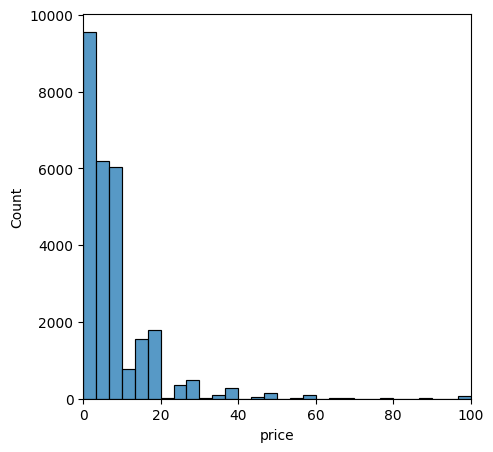

In [35]:
# veamos la distribución de precios:
plt.figure(figsize=(5,5))
sns.histplot(df_steam[df_steam['price']<100]['price'], bins=30)
plt.xlim(0,100);

media: 9.010060384726641


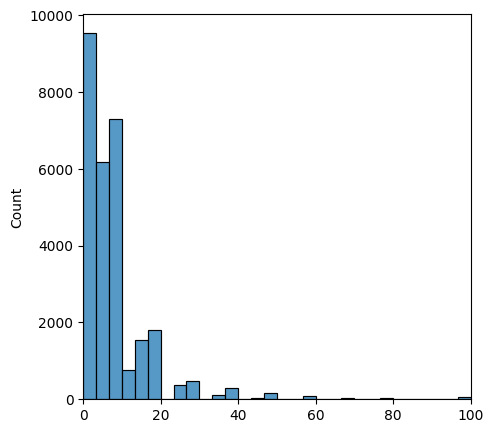

In [33]:
# veamos como afecta la imputación por media:
nanmean= np.nanmean(df_steam['price'])
print(f'media: {nanmean}')
plt.figure(figsize=(5,5))
arr= np.where(df_steam['price'].isna(), np.nanmean(df_steam['price']),df_steam['price'])
sns.histplot(arr[arr<100], bins=30)
plt.xlim(0,100);

mediana: 4.99


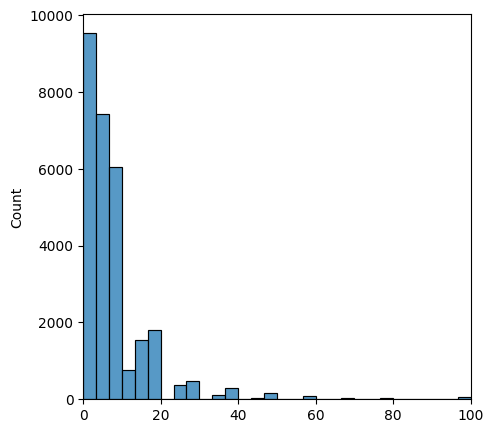

In [34]:
# veamos como afecta la imputación por mediana:
nanmedian= np.nanmedian(df_steam['price'])
print(f'mediana: {nanmedian}')
plt.figure(figsize=(5,5))
arr2= np.where(df_steam['price'].isna(), nanmedian,df_steam['price'])
sns.histplot(arr2[arr2<100], bins=30)
plt.xlim(0,100);

In [35]:
# vemos que la imputación por mediana afecta menos a la forma de la distribución de precios, ya que la mediana es menos sensible
# a valores extremos
# procedemos entonces a imputar por mediana y luego verificamos la imputación.

df_steam['price'] = np.where(df_steam['price'].isna(), nanmedian, df_steam['price'])
df_steam['price'].isna().sum()

0

In [36]:
df_steam.reset_index(inplace=True, drop=True)
df_steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28899 entries, 0 to 28898
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        28733 non-null  object 
 1   app_name      28899 non-null  object 
 2   title         28899 non-null  object 
 3   id            28899 non-null  int32  
 4   release_date  28881 non-null  object 
 5   tags          28761 non-null  object 
 6   specs         28613 non-null  object 
 7   price         28899 non-null  float64
 8   early_access  28899 non-null  int32  
 9   developer     28899 non-null  object 
dtypes: float64(1), int32(2), object(7)
memory usage: 2.0+ MB


In [37]:
df_steam.isna().sum()*100 / len(df_steam)                       # vemos que quedan pocos valores nulos

genres          0.574414
app_name        0.000000
title           0.000000
id              0.000000
release_date    0.062286
tags            0.477525
specs           0.989654
price           0.000000
early_access    0.000000
developer       0.000000
dtype: float64

In [38]:
df_steam['release_date'].isna().sum()        # vemos que hay solo 18 filas con release_date nulo

18

In [39]:
## vemos que en la columna release_date hay valores para corregir antes de pasar a tipo de dato fecha
for i in df_steam['release_date'].value_counts().index:
    print(i)

2012-10-16
2017-08-31
2017-09-26
2017-07-25
2017-12-19
2017-12-15
2017-10-31
2016-09-29
2017-12-05
2017-10-17
2017-08-22
2017-06-20
2017-11-14
2017-09-14
2016-06-16
2015-12-09
2017-10-20
2017-09-12
2017-11-17
2017-12-12
2016-12-20
2017-08-29
2016-07-05
2017-04-03
2017-12-14
2017-12-21
2016-10-25
2017-03-28
2016-12-15
2016-12-16
2017-10-25
2017-04-26
2017-09-15
2016-10-04
2017-02-14
2017-02-21
2017-12-06
2017-10-05
2017-09-01
2016-10-03
2017-12-01
2016-11-15
2017-08-01
2017-11-07
2017-08-08
2017-09-19
2017-05-11
2017-08-03
2016-06-02
2017-11-09
2017-08-02
2016-11-03
2017-09-21
2017-10-24
2017-08-15
2017-10-13
2017-12-08
2017-07-07
2016-11-01
2016-12-07
2014-12-16
2017-03-10
2017-11-30
2016-04-26
2017-07-14
2017-11-20
2017-11-02
2016-07-12
2017-09-28
2017-04-18
2017-04-25
2017-10-03
2016-12-13
2017-10-26
2017-04-12
2017-12-20
2016-12-01
2017-10-30
2017-07-20
2016-10-27
2017-11-21
2017-07-13
2017-09-20
2017-02-10
2017-08-25
2017-01-31
2012-08-30
2017-02-01
2015-10-29
2016-06-03
2016-07-26

In [40]:
# definimos una función para transformar fechas
def transformar_fechas(valor):
    # Primero intentamos convertir a fecha
    try:
        return pd.to_datetime(valor)
    except ValueError:
        # En caso de error, aplicamos estrategias específicas para diferentes casos

        # Caso: Año entre corchetes 
        match = re.search(r'\[(\d{4})\]', valor)
        if match:
            return pd.to_datetime(match.group(1), format='%Y')

        # Caso: Fecha en formato 'Month Year'
        match = re.search(r'(\w+ \d{4})', valor)
        if match:
            return pd.to_datetime(match.group(1), format='%B %Y', errors='coerce')

        # Caso: Año entre palabras
        match = re.search(r'(\d{4})', valor)
        if match:
            return pd.to_datetime(match.group(1), format='%Y', errors='coerce')

        # Caso: Mes y Año ('Jan 2018')
        match = re.search(r'(\w+ \d{4})', valor)
        if match:
            return pd.to_datetime(match.group(1), format='%b %Y', errors='coerce')

        # Si no se cumple ninguna condición, devolver NaN
        return pd.NaT

In [41]:
# creamos una nueva columna con las fechas corregidas
df_steam['nueva_fecha'] = df_steam['release_date'].apply(transformar_fechas)

In [42]:
for i in df_steam['nueva_fecha'].value_counts().index:
    print(i)

2012-10-16 00:00:00
2017-08-31 00:00:00
2017-09-26 00:00:00
2017-07-25 00:00:00
2017-12-19 00:00:00
2017-12-15 00:00:00
2017-10-31 00:00:00
2017-12-05 00:00:00
2016-09-29 00:00:00
2017-10-17 00:00:00
2017-08-22 00:00:00
2017-06-20 00:00:00
2017-11-14 00:00:00
2017-09-14 00:00:00
2016-06-16 00:00:00
2017-12-01 00:00:00
2017-10-20 00:00:00
2015-12-09 00:00:00
2017-09-12 00:00:00
2017-11-17 00:00:00
2017-12-12 00:00:00
2016-12-20 00:00:00
2017-08-29 00:00:00
2017-04-03 00:00:00
2016-07-05 00:00:00
2017-12-14 00:00:00
2017-12-21 00:00:00
2016-12-15 00:00:00
2017-03-28 00:00:00
2016-10-25 00:00:00
2016-12-16 00:00:00
2017-10-25 00:00:00
2016-10-04 00:00:00
2017-09-15 00:00:00
2017-04-26 00:00:00
2017-02-21 00:00:00
2017-02-14 00:00:00
2017-08-01 00:00:00
2017-12-06 00:00:00
2016-10-03 00:00:00
2017-09-01 00:00:00
2017-10-05 00:00:00
2017-08-08 00:00:00
2017-11-07 00:00:00
2017-09-19 00:00:00
2016-11-15 00:00:00
2017-05-11 00:00:00
2017-08-03 00:00:00
2017-11-09 00:00:00
2016-06-02 00:00:00


In [43]:
df_steam.drop(columns='release_date', inplace=True)                         # eliminamos la columna de fecha original
df_steam.rename(columns={'nueva_fecha': 'release_date'}, inplace= True)     # renombramos la nueva
df_steam.isna().sum()*100 / len(df_steam)                                   # vemos los nulos

genres          0.574414
app_name        0.000000
title           0.000000
id              0.000000
tags            0.477525
specs           0.989654
price           0.000000
early_access    0.000000
developer       0.000000
release_date    0.633240
dtype: float64

In [44]:
# ahora reemplazamos los NaT (nulos de datetime) con la moda de la fecha:
moda = df_steam['release_date'].mode()[0]
df_steam['release_date'] = df_steam['release_date'].fillna(moda)

In [45]:
df_steam.isna().sum()*100 / len(df_steam)

genres          0.574414
app_name        0.000000
title           0.000000
id              0.000000
tags            0.477525
specs           0.989654
price           0.000000
early_access    0.000000
developer       0.000000
release_date    0.000000
dtype: float64

In [46]:
df_steam['genres']                                      # vemos como está compuesta la columna genres

0            [Action, Casual, Indie, Simulation, Strategy]
1                     [Free to Play, Indie, RPG, Strategy]
2        [Casual, Free to Play, Indie, Simulation, Sports]
3                              [Action, Adventure, Casual]
4                          [Action, Adventure, Simulation]
                               ...                        
28894                   [Action, Adventure, Casual, Indie]
28895                [Casual, Indie, Simulation, Strategy]
28896                            [Casual, Indie, Strategy]
28897                          [Indie, Racing, Simulation]
28898                                      [Casual, Indie]
Name: genres, Length: 28899, dtype: object

In [47]:
df_steam['tags']                                            # vemos cómo está compuesta la columna tags

0            [Strategy, Action, Indie, Casual, Simulation]
1        [Free to Play, Strategy, Indie, RPG, Card Game...
2        [Free to Play, Simulation, Sports, Casual, Ind...
3                              [Action, Adventure, Casual]
4        [Action, Adventure, Simulation, FPS, Shooter, ...
                               ...                        
28894          [Action, Indie, Casual, Violent, Adventure]
28895                [Strategy, Indie, Casual, Simulation]
28896                            [Strategy, Indie, Casual]
28897                          [Indie, Simulation, Racing]
28898    [Indie, Casual, Puzzle, Singleplayer, Atmosphe...
Name: tags, Length: 28899, dtype: object

In [48]:
# vemos que las columnas 'tags' y 'genres' tienen información muy similar, 
# por lo que podemos completar los valores que faltan de una con los de la otra
df_steam['tags'] = df_steam.apply(lambda row: row['genres'] if row['tags'] in empty else row['tags'], axis=1)
df_steam['genres'] = df_steam.apply(lambda row: row['tags'] if row['genres'] in empty else row['genres'], axis=1)
df_steam.isna().sum()*100 / len(df_steam)

genres          0.394477
app_name        0.000000
title           0.000000
id              0.000000
tags            0.394477
specs           0.989654
price           0.000000
early_access    0.000000
developer       0.000000
release_date    0.000000
dtype: float64

In [49]:
df_steam[df_steam['genres'].isna()]                     # vemos las filas que tienen género vacío

,genres,app_name,title,id,tags,specs,price,early_access,developer,release_date
346,None,Europa Universalis III: Heir to the Throne,Europa Universalis III: Heir to the Throne,25806,None,"[Single-player, Multi-player, Downloadable Con...",9.99,0,Paradox Interactive,2009-12-15
457,None,Booster Trooper Demo,Booster Trooper Demo,27930,None,[Game demo],4.99,0,DnS Development,2010-08-31
600,None,"Warhammer 40,000: Dawn of War II - Retribution...","Warhammer 40,000: Dawn of War II - Retribution...",56436,None,[Downloadable Content],0.99,0,"Relic Entertainment,Feral Interactive (Mac/Linux)",2011-02-28
767,None,Dungeon Defenders Halloween Costume Pack,Dungeon Defenders Halloween Costume Pack,202520,None,[Downloadable Content],0.99,0,Trendy Entertainment,2011-11-11
768,None,Dungeon Defenders Capture the Flag Pre-Alpha P...,Dungeon Defenders Capture the Flag Pre-Alpha P...,202523,None,[Downloadable Content],4.99,0,Trendy Entertainment,2011-11-11
...,...,...,...,...,...,...,...,...,...,...
27971,None,Total War: SHOGUN 2 - Sengoku Jidai Unit Pack,Total War: SHOGUN 2 - Sengoku Jidai Unit Pack,34342,None,[Downloadable Content],2.99,0,"The Creative Assembly,Feral Interactive (Mac),...",2011-07-28
28052,None,"Worms Reloaded: The ""Pre-order Forts and Hats""...","Worms Reloaded: The ""Pre-order Forts and Hats""...",22630,None,[Downloadable Content],1.99,0,Team17 Digital Ltd,2011-05-17
28063,None,Total War: SHOGUN 2 - The Ikko Ikki Clan Pack,Total War: SHOGUN 2 - The Ikko Ikki Clan Pack,34348,None,[Downloadable Content],4.99,0,"The Creative Assembly,Feral Interactive (Mac),...",2011-05-26
28114,None,"Killing Floor ""London's Finest"" Character Pack","Killing Floor ""London's Finest"" Character Pack",35419,None,[Downloadable Content],7.99,0,Tripwire Interactive,2010-12-14


In [50]:
# para uso posterior en EDA, vamos a necesitar un archivo con los géneros por separado para cada juego
df_genres = df_steam.explode('genres').reset_index(drop=True)              # aquí generamos un nuevo dataframe con formato large para genres
df_genres.head()

,genres,app_name,title,id,tags,specs,price,early_access,developer,release_date
0,Action,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0,Kotoshiro,2018-01-04
1,Casual,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0,Kotoshiro,2018-01-04
2,Indie,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0,Kotoshiro,2018-01-04
3,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0,Kotoshiro,2018-01-04
4,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0,Kotoshiro,2018-01-04


In [51]:
import pandas as pd
import os

# Definir la ruta completa al directorio CleanData en tu escritorio
output_dir = "C:\\Users\\Sofia\\Desktop\\Clean Data"
# Exportar df_genres en formato Parquet
df_genres.to_parquet(f'{output_dir}/genres.parquet')
              # exportamos en formato parquet

In [52]:
# para uso posterior en EDA, vamos a necesitar un archivo con los tags por separado para cada juego
df_tags = df_steam.explode('tags').reset_index(drop=True)               # aquí generamos un nuevo dataframe con formato large para tags
df_tags.head()

,genres,app_name,title,id,tags,specs,price,early_access,developer,release_date
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,761140,Strategy,[Single-player],4.99,0,Kotoshiro,2018-01-04
1,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,761140,Action,[Single-player],4.99,0,Kotoshiro,2018-01-04
2,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,761140,Indie,[Single-player],4.99,0,Kotoshiro,2018-01-04
3,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,761140,Casual,[Single-player],4.99,0,Kotoshiro,2018-01-04
4,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,761140,Simulation,[Single-player],4.99,0,Kotoshiro,2018-01-04


In [53]:


# Definir la ruta completa al directorio CleanData en tu escritorio
output_dir = "C:\\Users\\Sofia\\Desktop\\Clean Data"
# Exportar df_genres en formato Parquet
df_genres.to_parquet(f'{output_dir}/tags.parquet')

In [54]:
# para uso posterior en EDA, vamos a necesitar un archivo con los specs por separado para cada juego
df_specs = df_steam.explode('specs').reset_index(drop=True)             # aquí generamos un nuevo dataframe con formato large para specs
df_specs.head()

,genres,app_name,title,id,tags,specs,price,early_access,developer,release_date
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",Single-player,4.99,0,Kotoshiro,2018-01-04
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,643980,"[Free to Play, Strategy, Indie, RPG, Card Game...",Single-player,0.00,0,Secret Level SRL,2018-01-04
2,"[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,643980,"[Free to Play, Strategy, Indie, RPG, Card Game...",Multi-player,0.00,0,Secret Level SRL,2018-01-04
3,"[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,643980,"[Free to Play, Strategy, Indie, RPG, Card Game...",Online Multi-Player,0.00,0,Secret Level SRL,2018-01-04
4,"[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,643980,"[Free to Play, Strategy, Indie, RPG, Card Game...",Cross-Platform Multiplayer,0.00,0,Secret Level SRL,2018-01-04


In [55]:
# Definir la ruta completa al directorio CleanData en tu escritorio
output_dir = "C:\\Users\\Sofia\\Desktop\\Clean Data"
# Exportar df_genres en formato Parquet
df_genres.to_parquet(f'{output_dir}/specs.parquet')                    # exportamos en formato parquet

In [56]:
# aquí generamos primero un dataframe expandido para genres, luego generamos las dummies, y luego lo unimos al dataframe original, para luego
# eliminar la columna genres.
df_expanded = df_steam['genres'].explode().reset_index(drop=True)
df_dummies = pd.get_dummies(df_expanded, prefix='genre').astype(int)
df = pd.concat([df_steam, df_dummies], axis=1)
df.drop('genres', axis=1, inplace=True)
df.head()

,app_name,title,id,tags,specs,price,early_access,developer,release_date,genre_1990's,...,genre_Top-Down Shooter,genre_Tower Defense,genre_Twin Stick Shooter,genre_Utilities,genre_Video Production,genre_Violent,genre_Visual Novel,genre_War,genre_Web Publishing,genre_Zombies
0,Lost Summoner Kitty,Lost Summoner Kitty,761140.0,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0.0,Kotoshiro,2018-01-04,0,...,0,0,0,0,0,0,0,0,0,0
1,Ironbound,Ironbound,643980.0,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",0.00,0.0,Secret Level SRL,2018-01-04,0,...,0,0,0,0,0,0,0,0,0,0
2,Real Pool 3D - Poolians,Real Pool 3D - Poolians,670290.0,"[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",0.00,0.0,Poolians.com,2017-07-24,0,...,0,0,0,0,0,0,0,0,0,0
3,弹炸人2222,弹炸人2222,767400.0,"[Action, Adventure, Casual]",[Single-player],0.99,0.0,彼岸领域,2017-12-07,0,...,0,0,0,0,0,0,0,0,0,0
4,Battle Royale Trainer,Battle Royale Trainer,772540.0,"[Action, Adventure, Simulation, FPS, Shooter, ...","[Single-player, Steam Achievements]",3.99,0.0,Trickjump Games Ltd,2018-01-04,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# aquí generamos primero un dataframe expandido para specs, luego generamos las dummies, y luego lo unimos al dataframe original, para luego
# eliminar la columna specs.
df_expanded = df_steam['specs'].explode().reset_index(drop=True)
df_dummies = pd.get_dummies(df_expanded, prefix='spec').astype(int)
df = pd.concat([df, df_dummies], axis=1)
df.drop('specs', axis=1, inplace=True)
df.head()

,app_name,title,id,tags,price,early_access,developer,release_date,genre_1990's,genre_2D,...,spec_Single-player,spec_Stats,spec_Steam Achievements,spec_Steam Cloud,spec_Steam Leaderboards,spec_Steam Trading Cards,spec_Steam Turn Notifications,spec_Steam Workshop,spec_SteamVR Collectibles,spec_Valve Anti-Cheat enabled
0,Lost Summoner Kitty,Lost Summoner Kitty,761140.0,"[Strategy, Action, Indie, Casual, Simulation]",4.99,0.0,Kotoshiro,2018-01-04,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,Ironbound,Ironbound,643980.0,"[Free to Play, Strategy, Indie, RPG, Card Game...",0.00,0.0,Secret Level SRL,2018-01-04,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,Real Pool 3D - Poolians,Real Pool 3D - Poolians,670290.0,"[Free to Play, Simulation, Sports, Casual, Ind...",0.00,0.0,Poolians.com,2017-07-24,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,弹炸人2222,弹炸人2222,767400.0,"[Action, Adventure, Casual]",0.99,0.0,彼岸领域,2017-12-07,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Battle Royale Trainer,Battle Royale Trainer,772540.0,"[Action, Adventure, Simulation, FPS, Shooter, ...",3.99,0.0,Trickjump Games Ltd,2018-01-04,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# aquí generamos primero un dataframe expandido para tags, luego generamos las dummies, y luego lo unimos al dataframe original, para luego
# eliminar la columna tags.
df_expanded = df_steam['tags'].explode().reset_index(drop=True)
df_dummies = pd.get_dummies(df_expanded, prefix='tag').astype(int)
df = pd.concat([df, df_dummies], axis=1)
df.drop('tags', axis=1, inplace=True)
df.head()

,app_name,title,id,price,early_access,developer,release_date,genre_1990's,genre_2D,genre_3D Platformer,...,tag_Warhammer 40K,tag_Web Publishing,tag_Werewolves,tag_Western,tag_Word Game,tag_World War I,tag_World War II,tag_Wrestling,tag_Zombies,tag_e-sports
0,Lost Summoner Kitty,Lost Summoner Kitty,761140.0,4.99,0.0,Kotoshiro,2018-01-04,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Ironbound,Ironbound,643980.0,0.00,0.0,Secret Level SRL,2018-01-04,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Real Pool 3D - Poolians,Real Pool 3D - Poolians,670290.0,0.00,0.0,Poolians.com,2017-07-24,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,弹炸人2222,弹炸人2222,767400.0,0.99,0.0,彼岸领域,2017-12-07,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Battle Royale Trainer,Battle Royale Trainer,772540.0,3.99,0.0,Trickjump Games Ltd,2018-01-04,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df_steam[df_steam['id'] == 761140]

,genres,app_name,title,id,tags,specs,price,early_access,developer,release_date
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0,Kotoshiro,2018-01-04


In [60]:
pd.set_option('display.max_columns', None)              # seteamos para que se muestren todas las columnas en jupyter

In [61]:
df[df['id'] == 761140.0]['genre_Action']                # verificamos que las transformaciones fueron como se quería

0    1.0
Name: genre_Action, dtype: float64

In [62]:
df[df['id'] == 761140.0]['spec_Single-player']          # verificamos que las transformaciones fueron como se quería

0    1.0
Name: spec_Single-player, dtype: float64

In [63]:
col_float = list(df.select_dtypes('float').columns)     # seleccionamos las columnas float
col_float.remove('price')                               # removemos la columna price de la lista anterior
cols = list(df.columns)                                 # obtenemos otra lista con todas las columnas

In [64]:
df_temp = df[[x for x in cols if x not in col_float]]   # generamos un dataframe temporal seleccionando solo las columnas que no son float

In [66]:
# Manejo de NaN: rellenar con 0 (puedes elegir otro valor)
df[col_float] = df[col_float].fillna(0)

In [67]:
# unimos el dataframe temporal con el dataframe original filtrado a las columnas float transformadas a int
df = pd.concat([df_temp, df[col_float].astype(int)], axis=1)
df.head()

,app_name,title,price,developer,release_date,tag_1980s,tag_1990's,tag_2.5D,tag_2D,tag_2D Fighter,tag_3D Platformer,tag_3D Vision,tag_4 Player Local,tag_4X,tag_6DOF,tag_Abstract,tag_Accounting,tag_Action,tag_Action RPG,tag_Action-Adventure,tag_Adventure,tag_Agriculture,tag_Aliens,tag_Alternate History,tag_America,tag_Animation & Modeling,tag_Anime,tag_Arcade,tag_Arena Shooter,tag_Artificial Intelligence,tag_Assassin,tag_Asynchronous Multiplayer,tag_Atmospheric,tag_Audio Production,tag_Base Building,tag_Based On A Novel,tag_Basketball,tag_Batman,tag_Beat 'em up,tag_Benchmark,tag_Blood,tag_Board Game,tag_Bowling,tag_Building,tag_Bullet Hell,tag_Bullet Time,tag_CRPG,tag_Capitalism,tag_Card Game,tag_Cartoon,tag_Cartoony,tag_Casual,tag_Character Action Game,tag_Character Customization,tag_Chess,tag_Choices Matter,tag_Choose Your Own Adventure,tag_Cinematic,tag_City Builder,tag_Class-Based,tag_Classic,tag_Clicker,tag_Co-op,tag_Co-op Campaign,tag_Cold War,tag_Colorful,tag_Comedy,tag_Comic Book,tag_Competitive,tag_Conspiracy,tag_Controller,tag_Conversation,tag_Crafting,tag_Crime,tag_Crowdfunded,tag_Cult Classic,tag_Cute,tag_Cyberpunk,tag_Cycling,tag_Dark,tag_Dark Comedy,tag_Dark Fantasy,tag_Dark Humor,tag_Dating Sim,tag_Demons,tag_Design & Illustration,tag_Destruction,tag_Detective,tag_Difficult,tag_Dinosaurs,tag_Diplomacy,tag_Documentary,tag_Dragons,tag_Drama,tag_Driving,tag_Dungeon Crawler,tag_Dynamic Narration,tag_Dystopian,tag_Early Access,tag_Economy,tag_Education,tag_Episodic,tag_Experience,tag_Experimental,tag_Exploration,tag_FMV,tag_FPS,tag_Faith,tag_Family Friendly,tag_Fantasy,tag_Fast-Paced,tag_Female Protagonist,tag_Fighting,tag_First-Person,tag_Fishing,tag_Flight,tag_Football,tag_Foreign,tag_Free to Play,tag_Funny,tag_Futuristic,tag_Gambling,tag_Game Development,tag_GameMaker,tag_Games Workshop,tag_Gaming,tag_God Game,tag_Golf,tag_Gore,tag_Gothic,tag_Grand Strategy,tag_Great Soundtrack,tag_Grid-Based Movement,tag_Gun Customization,tag_Hack and Slash,tag_Hacking,tag_Hand-drawn,tag_Hardware,tag_Heist,tag_Hex Grid,tag_Hidden Object,tag_Historical,tag_Horror,tag_Horses,tag_Hunting,tag_Illuminati,tag_Indie,tag_Intentionally Awkward Controls,tag_Interactive Fiction,tag_Inventory Management,tag_Investigation,tag_Isometric,tag_JRPG,tag_Kickstarter,tag_LEGO,tag_Lara Croft,tag_Lemmings,tag_Level Editor,tag_Linear,tag_Local Co-Op,tag_Local Multiplayer,tag_Loot,tag_Lore-Rich,tag_Lovecraftian,tag_MMORPG,tag_MOBA,tag_Magic,tag_Management,tag_Mars,tag_Martial Arts,tag_Massively Multiplayer,tag_Match 3,tag_Mature,tag_Mechs,tag_Medieval,tag_Memes,tag_Metroidvania,tag_Military,tag_Mini Golf,tag_Minimalist,tag_Mining,tag_Mod,tag_Moddable,tag_Modern,tag_Mouse only,tag_Movie,tag_Multiplayer,tag_Multiple Endings,tag_Music,tag_Music-Based Procedural Generation,tag_Mystery,tag_Mystery Dungeon,tag_Mythology,tag_NSFW,tag_Narration,tag_Naval,tag_Ninja,tag_Noir,tag_Nonlinear,tag_Nudity,tag_Offroad,tag_On-Rails Shooter,tag_Online Co-Op,tag_Open World,tag_Otome,tag_Parkour,tag_Parody,tag_Party-Based RPG,tag_Perma Death,tag_Philisophical,tag_Photo Editing,tag_Physics,tag_Pinball,tag_Pirates,tag_Pixel Graphics,tag_Platformer,tag_Point & Click,tag_Political,tag_Politics,tag_Pool,tag_Post-apocalyptic,tag_Procedural Generation,tag_Programming,tag_Psychedelic,tag_Psychological,tag_Psychological Horror,tag_Puzzle,tag_Puzzle-Platformer,tag_PvE,tag_PvP,tag_Quick-Time Events,tag_RPG,tag_RPGMaker,tag_RTS,tag_Racing,tag_Real Time Tactics,tag_Real-Time,tag_Real-Time with Pause,tag_Realistic,tag_Relaxing,tag_Remake,tag_Replay Value,tag_Resource Management,tag_Retro,tag_Rhythm,tag_Robots,tag_Rogue-like,tag_Rogue-lite,tag_Romance,tag_Rome,tag_Runner,tag_Sailing,tag_Sandbox,tag_Satire,tag_Sci-fi,tag_Science,tag_Score Attack,tag_Sexual Content,tag_Shoot 'Em Up,tag_Shooter,tag_Short,tag_Side Scroller,tag_Silent Protagonist,tag_Simulation,tag_Singleplayer,tag_Sniper,tag_Soccer,tag_Software,tag_Software Training,tag_Sokoban,tag_Soundtrack,tag_Space,tag_Space Sim,tag_Spectac

In [68]:
# colocamos la columna id en primer lugar
columnas = ['id'] + [col for col in df if col != 'id']
df = df[columnas]

In [71]:
df.sample(1)                            # vemos una fila muestra

,id,app_name,title,price,developer,release_date,tag_1980s,tag_1990's,tag_2.5D,tag_2D,tag_2D Fighter,tag_3D Platformer,tag_3D Vision,tag_4 Player Local,tag_4X,tag_6DOF,tag_Abstract,tag_Accounting,tag_Action,tag_Action RPG,tag_Action-Adventure,tag_Adventure,tag_Agriculture,tag_Aliens,tag_Alternate History,tag_America,tag_Animation & Modeling,tag_Anime,tag_Arcade,tag_Arena Shooter,tag_Artificial Intelligence,tag_Assassin,tag_Asynchronous Multiplayer,tag_Atmospheric,tag_Audio Production,tag_Base Building,tag_Based On A Novel,tag_Basketball,tag_Batman,tag_Beat 'em up,tag_Benchmark,tag_Blood,tag_Board Game,tag_Bowling,tag_Building,tag_Bullet Hell,tag_Bullet Time,tag_CRPG,tag_Capitalism,tag_Card Game,tag_Cartoon,tag_Cartoony,tag_Casual,tag_Character Action Game,tag_Character Customization,tag_Chess,tag_Choices Matter,tag_Choose Your Own Adventure,tag_Cinematic,tag_City Builder,tag_Class-Based,tag_Classic,tag_Clicker,tag_Co-op,tag_Co-op Campaign,tag_Cold War,tag_Colorful,tag_Comedy,tag_Comic Book,tag_Competitive,tag_Conspiracy,tag_Controller,tag_Conversation,tag_Crafting,tag_Crime,tag_Crowdfunded,tag_Cult Classic,tag_Cute,tag_Cyberpunk,tag_Cycling,tag_Dark,tag_Dark Comedy,tag_Dark Fantasy,tag_Dark Humor,tag_Dating Sim,tag_Demons,tag_Design & Illustration,tag_Destruction,tag_Detective,tag_Difficult,tag_Dinosaurs,tag_Diplomacy,tag_Documentary,tag_Dragons,tag_Drama,tag_Driving,tag_Dungeon Crawler,tag_Dynamic Narration,tag_Dystopian,tag_Early Access,tag_Economy,tag_Education,tag_Episodic,tag_Experience,tag_Experimental,tag_Exploration,tag_FMV,tag_FPS,tag_Faith,tag_Family Friendly,tag_Fantasy,tag_Fast-Paced,tag_Female Protagonist,tag_Fighting,tag_First-Person,tag_Fishing,tag_Flight,tag_Football,tag_Foreign,tag_Free to Play,tag_Funny,tag_Futuristic,tag_Gambling,tag_Game Development,tag_GameMaker,tag_Games Workshop,tag_Gaming,tag_God Game,tag_Golf,tag_Gore,tag_Gothic,tag_Grand Strategy,tag_Great Soundtrack,tag_Grid-Based Movement,tag_Gun Customization,tag_Hack and Slash,tag_Hacking,tag_Hand-drawn,tag_Hardware,tag_Heist,tag_Hex Grid,tag_Hidden Object,tag_Historical,tag_Horror,tag_Horses,tag_Hunting,tag_Illuminati,tag_Indie,tag_Intentionally Awkward Controls,tag_Interactive Fiction,tag_Inventory Management,tag_Investigation,tag_Isometric,tag_JRPG,tag_Kickstarter,tag_LEGO,tag_Lara Croft,tag_Lemmings,tag_Level Editor,tag_Linear,tag_Local Co-Op,tag_Local Multiplayer,tag_Loot,tag_Lore-Rich,tag_Lovecraftian,tag_MMORPG,tag_MOBA,tag_Magic,tag_Management,tag_Mars,tag_Martial Arts,tag_Massively Multiplayer,tag_Match 3,tag_Mature,tag_Mechs,tag_Medieval,tag_Memes,tag_Metroidvania,tag_Military,tag_Mini Golf,tag_Minimalist,tag_Mining,tag_Mod,tag_Moddable,tag_Modern,tag_Mouse only,tag_Movie,tag_Multiplayer,tag_Multiple Endings,tag_Music,tag_Music-Based Procedural Generation,tag_Mystery,tag_Mystery Dungeon,tag_Mythology,tag_NSFW,tag_Narration,tag_Naval,tag_Ninja,tag_Noir,tag_Nonlinear,tag_Nudity,tag_Offroad,tag_On-Rails Shooter,tag_Online Co-Op,tag_Open World,tag_Otome,tag_Parkour,tag_Parody,tag_Party-Based RPG,tag_Perma Death,tag_Philisophical,tag_Photo Editing,tag_Physics,tag_Pinball,tag_Pirates,tag_Pixel Graphics,tag_Platformer,tag_Point & Click,tag_Political,tag_Politics,tag_Pool,tag_Post-apocalyptic,tag_Procedural Generation,tag_Programming,tag_Psychedelic,tag_Psychological,tag_Psychological Horror,tag_Puzzle,tag_Puzzle-Platformer,tag_PvE,tag_PvP,tag_Quick-Time Events,tag_RPG,tag_RPGMaker,tag_RTS,tag_Racing,tag_Real Time Tactics,tag_Real-Time,tag_Real-Time with Pause,tag_Realistic,tag_Relaxing,tag_Remake,tag_Replay Value,tag_Resource Management,tag_Retro,tag_Rhythm,tag_Robots,tag_Rogue-like,tag_Rogue-lite,tag_Romance,tag_Rome,tag_Runner,tag_Sailing,tag_Sandbox,tag_Satire,tag_Sci-fi,tag_Science,tag_Score Attack,tag_Sexual Content,tag_Shoot 'Em Up,tag_Shooter,tag_Short,tag_Side Scroller,tag_Silent Protagonist,tag_Simulation,tag_Singleplayer,tag_Sniper,tag_Soccer,tag_Software,tag_Software Training,tag_Sokoban,tag_Soundtrack,tag_Space,tag_Space Sim,tag_Spec

In [72]:
df.info()                               # vemos información del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155382 entries, 0 to 155381
Columns: 496 entries, id to spec_Valve Anti-Cheat enabled
dtypes: datetime64[ns](1), float64(1), int32(491), object(3)
memory usage: 297.0+ MB


In [73]:
print(df[df.duplicated()])



        id app_name title  price developer release_date  tag_1980s  \
28953    0      NaN   NaN    NaN       NaN          NaT          0   
29022    0      NaN   NaN    NaN       NaN          NaT          0   
29037    0      NaN   NaN    NaN       NaN          NaT          0   
29081    0      NaN   NaN    NaN       NaN          NaT          0   
29090    0      NaN   NaN    NaN       NaN          NaT          0   
...     ..      ...   ...    ...       ...          ...        ...   
155377   0      NaN   NaN    NaN       NaN          NaT          0   
155378   0      NaN   NaN    NaN       NaN          NaT          0   
155379   0      NaN   NaN    NaN       NaN          NaT          0   
155380   0      NaN   NaN    NaN       NaN          NaT          0   
155381   0      NaN   NaN    NaN       NaN          NaT          0   

        tag_1990's  tag_2.5D  tag_2D  tag_2D Fighter  tag_3D Platformer  \
28953            0         0       0               0                  0   
29022    

In [87]:
df.duplicated(subset= 'id').sum()                               # verificamos que no hayan quedado duplicados

19032

In [74]:
df = df.rename(columns= lambda x: x.lower())                    # pasamos los nombres de las columnas a minúscula
df.head()

,id,app_name,title,price,developer,release_date,tag_1980s,tag_1990's,tag_2.5d,tag_2d,tag_2d fighter,tag_3d platformer,tag_3d vision,tag_4 player local,tag_4x,tag_6dof,tag_abstract,tag_accounting,tag_action,tag_action rpg,tag_action-adventure,tag_adventure,tag_agriculture,tag_aliens,tag_alternate history,tag_america,tag_animation & modeling,tag_anime,tag_arcade,tag_arena shooter,tag_artificial intelligence,tag_assassin,tag_asynchronous multiplayer,tag_atmospheric,tag_audio production,tag_base building,tag_based on a novel,tag_basketball,tag_batman,tag_beat 'em up,tag_benchmark,tag_blood,tag_board game,tag_bowling,tag_building,tag_bullet hell,tag_bullet time,tag_crpg,tag_capitalism,tag_card game,tag_cartoon,tag_cartoony,tag_casual,tag_character action game,tag_character customization,tag_chess,tag_choices matter,tag_choose your own adventure,tag_cinematic,tag_city builder,tag_class-based,tag_classic,tag_clicker,tag_co-op,tag_co-op campaign,tag_cold war,tag_colorful,tag_comedy,tag_comic book,tag_competitive,tag_conspiracy,tag_controller,tag_conversation,tag_crafting,tag_crime,tag_crowdfunded,tag_cult classic,tag_cute,tag_cyberpunk,tag_cycling,tag_dark,tag_dark comedy,tag_dark fantasy,tag_dark humor,tag_dating sim,tag_demons,tag_design & illustration,tag_destruction,tag_detective,tag_difficult,tag_dinosaurs,tag_diplomacy,tag_documentary,tag_dragons,tag_drama,tag_driving,tag_dungeon crawler,tag_dynamic narration,tag_dystopian,tag_early access,tag_economy,tag_education,tag_episodic,tag_experience,tag_experimental,tag_exploration,tag_fmv,tag_fps,tag_faith,tag_family friendly,tag_fantasy,tag_fast-paced,tag_female protagonist,tag_fighting,tag_first-person,tag_fishing,tag_flight,tag_football,tag_foreign,tag_free to play,tag_funny,tag_futuristic,tag_gambling,tag_game development,tag_gamemaker,tag_games workshop,tag_gaming,tag_god game,tag_golf,tag_gore,tag_gothic,tag_grand strategy,tag_great soundtrack,tag_grid-based movement,tag_gun customization,tag_hack and slash,tag_hacking,tag_hand-drawn,tag_hardware,tag_heist,tag_hex grid,tag_hidden object,tag_historical,tag_horror,tag_horses,tag_hunting,tag_illuminati,tag_indie,tag_intentionally awkward controls,tag_interactive fiction,tag_inventory management,tag_investigation,tag_isometric,tag_jrpg,tag_kickstarter,tag_lego,tag_lara croft,tag_lemmings,tag_level editor,tag_linear,tag_local co-op,tag_local multiplayer,tag_loot,tag_lore-rich,tag_lovecraftian,tag_mmorpg,tag_moba,tag_magic,tag_management,tag_mars,tag_martial arts,tag_massively multiplayer,tag_match 3,tag_mature,tag_mechs,tag_medieval,tag_memes,tag_metroidvania,tag_military,tag_mini golf,tag_minimalist,tag_mining,tag_mod,tag_moddable,tag_modern,tag_mouse only,tag_movie,tag_multiplayer,tag_multiple endings,tag_music,tag_music-based procedural generation,tag_mystery,tag_mystery dungeon,tag_mythology,tag_nsfw,tag_narration,tag_naval,tag_ninja,tag_noir,tag_nonlinear,tag_nudity,tag_offroad,tag_on-rails shooter,tag_online co-op,tag_open world,tag_otome,tag_parkour,tag_parody,tag_party-based rpg,tag_perma death,tag_philisophical,tag_photo editing,tag_physics,tag_pinball,tag_pirates,tag_pixel graphics,tag_platformer,tag_point & click,tag_political,tag_politics,tag_pool,tag_post-apocalyptic,tag_procedural generation,tag_programming,tag_psychedelic,tag_psychological,tag_psychological horror,tag_puzzle,tag_puzzle-platformer,tag_pve,tag_pvp,tag_quick-time events,tag_rpg,tag_rpgmaker,tag_rts,tag_racing,tag_real time tactics,tag_real-time,tag_real-time with pause,tag_realistic,tag_relaxing,tag_remake,tag_replay value,tag_resource management,tag_retro,tag_rhythm,tag_robots,tag_rogue-like,tag_rogue-lite,tag_romance,tag_rome,tag_runner,tag_sailing,tag_sandbox,tag_satire,tag_sci-fi,tag_science,tag_score attack,tag_sexual content,tag_shoot 'em up,tag_shooter,tag_short,tag_side scroller,tag_silent protagonist,tag_simulation,tag_singleplayer,tag_sniper,tag_soccer,tag_software,tag_software training,tag_sokoban,tag_soundtrack,tag_space,tag_space sim,tag_spec

In [75]:
# Definir la ruta completa al directorio CleanData en tu escritorio
output_dir = "C:\\Users\\Sofia\\Desktop\\Clean Data"
# Exportar df_genres en formato Parquet
df_genres.to_parquet(f'{output_dir}/steam_games.parquet')  

In [80]:
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv('etl_steam_games_limpio.csv')

# Guardar como archivo Parquet
df.to_parquet('etl_steam_games_limpio.parquet', engine='pyarrow')  # O 'fastparquet'
